In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
! unzip -q "/content/drive/MyDrive/Colab Notebooks/Thesis/Road-damage-classification.zip"

In [3]:
datasets_dir =  "/content/sih_road_dataset"

In [4]:
IMG_SIZE = 128
BATCH_SIZE = 32
epochs = 20

In [5]:
import tensorflow as tf
tf.random.set_seed(42)

train_data = tf.keras.preprocessing.image_dataset_from_directory(
    directory = datasets_dir,
    image_size = (IMG_SIZE, IMG_SIZE),
    label_mode = 'categorical',
    color_mode="rgb",
    batch_size = BATCH_SIZE,
    seed=42,
    shuffle = True,
    validation_split=0.2,
    subset="training"

).prefetch(buffer_size=tf.data.AUTOTUNE)


test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    directory = datasets_dir,
    image_size =  (IMG_SIZE, IMG_SIZE),
    label_mode = 'categorical',
    color_mode="rgb",
    batch_size = BATCH_SIZE,
    seed=42,
    shuffle = True,
    validation_split=0.2,
    subset="validation"

)
class_names = test_dataset.class_names
test_data = test_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)
# test_data = test_dataset.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
class_names


Found 2074 files belonging to 4 classes.
Using 1660 files for training.
Found 2074 files belonging to 4 classes.
Using 414 files for validation.


['good', 'poor', 'satisfactory', 'very_poor']

In [10]:
import tensorflow as tf

data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomFlip("horizontal", input_shape=(IMG_SIZE, IMG_SIZE, 3)),
  tf.keras.layers.RandomRotation(0.2),
  tf.keras.layers.RandomZoom(0.2),
  tf.keras.layers.RandomHeight(0.2),
  tf.keras.layers.RandomWidth(0.2)
], name="data_augmentation")

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


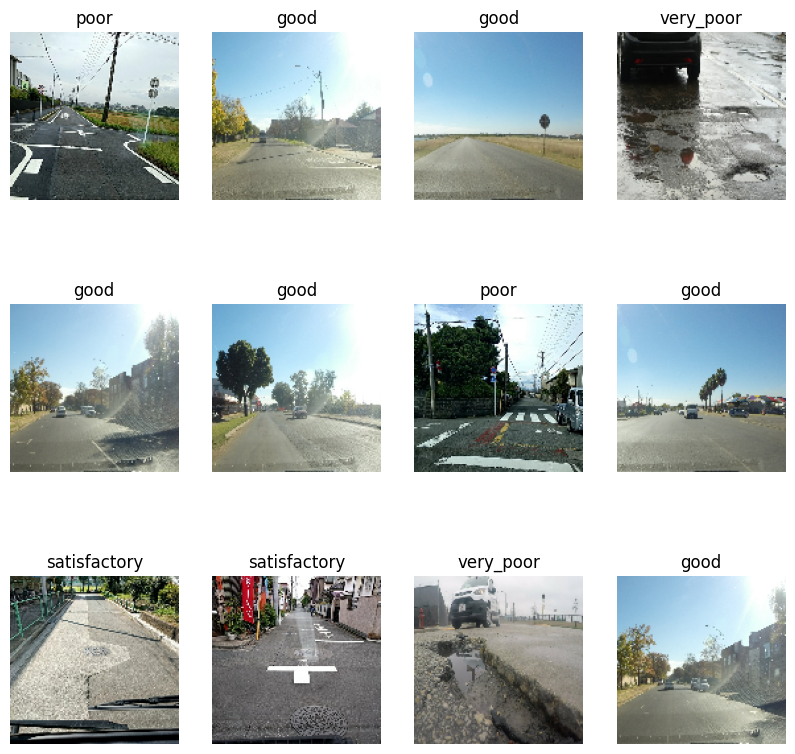

In [11]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10,10))

for image_batch,label_batch in train_data.take(1):
    for i in range(0,12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[np.argmax(label_batch[i])])
        plt.axis("off")

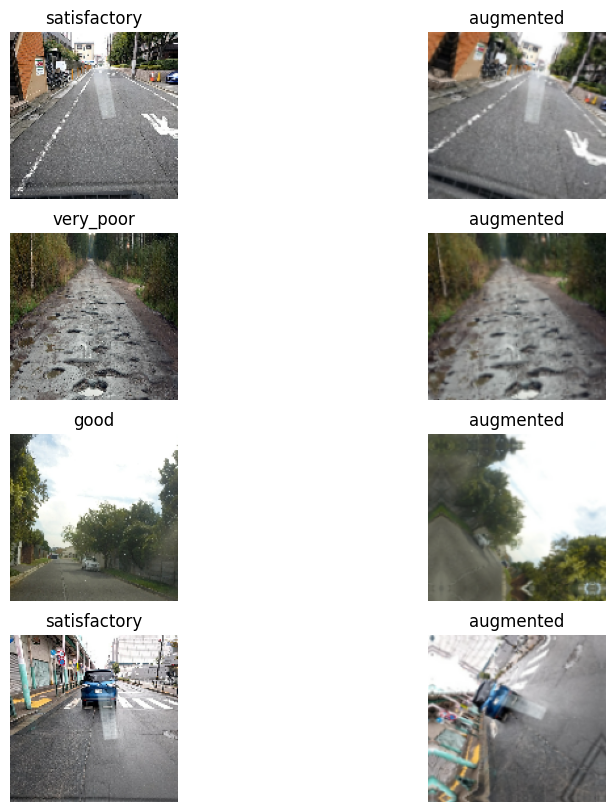

In [12]:
plt.figure(figsize=(10,10))
for image_batch,label_batch in train_data.take(1):
    augmented_image_batch = data_augmentation(image_batch)
    image_plt_len = len(image_batch) if len(image_batch) < 4 else 4
    for i in range(0, image_plt_len):
        plt.subplot(image_plt_len,2,2*i+1)
        plt.imshow(image_batch[i].numpy().astype("uint32"))
        plt.title(class_names[np.argmax(label_batch[i])])
        plt.axis("off")
        plt.subplot(image_plt_len,2,2*i+2)
        img = augmented_image_batch[i]
        img = np.array(img, dtype=np.int32)
        plt.imshow(img)
        plt.title(f"augmented")
        plt.axis("off")

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 128, 128, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ data_augmentation         │ (None, None, None, 3)  │              0 │ input_layer[0][0]      │
│ (Sequential)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ efficientnetb0            │ (None, None, None,     │      4,049,571 │ data_augmentation[0][… │
│ (Functional)              │ 1280)                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ resnet50 (Functional)     │ (None, None, None,     │     23,587,712 │ data_augmentation[0][… │
│                           │ 2048)                  │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_avg_pooling_layer1 │ (None, 1280)           │              0 │ efficientnetb0[0][0]   │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_avg_pooling_layer2 │ (None, 2048)           │              0 │ resnet50[0][0]         │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 3328)           │              0 │ global_avg_pooling_la… │
│                           │                        │                │ global_avg_pooling_la… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout (Dropout)         │ (None, 3328)           │              0 │ concatenate[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 256)            │        852,224 │ dropout[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256)            │          1,024 │ dense[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ output_layer (Dense)      │ (None, 4)              │          1,028 │ batch_normalization[0… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 28,491,559 (108.69 MB)

 Trainable params: 12,311,956 (46.97 MB)

 Non-trainable params: 16,179,603 (61.72 MB)

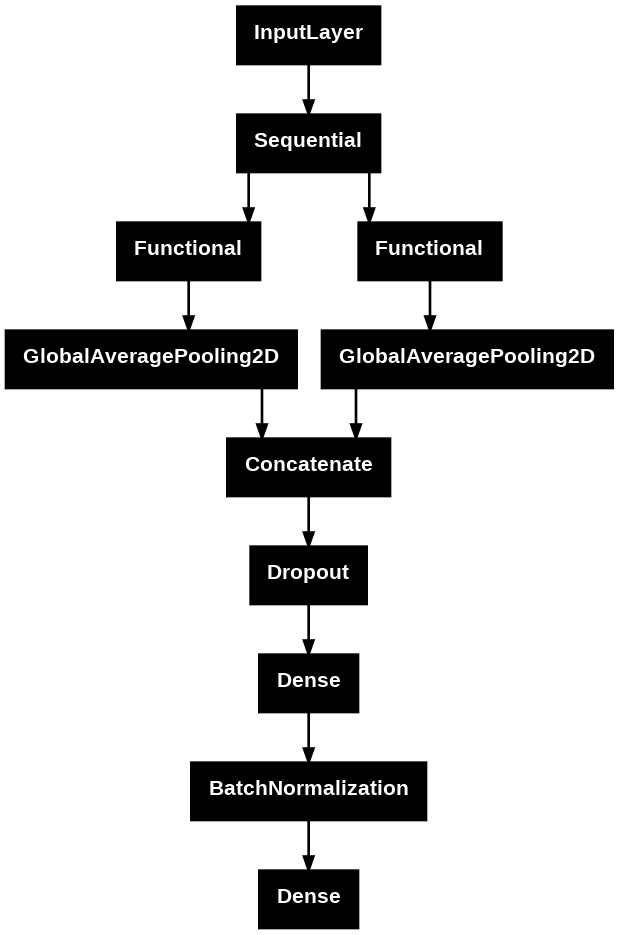

In [13]:
import tensorflow as tf

# Setup the base models and freeze their layers (this will extract features)
base_model1 = tf.keras.applications.EfficientNetB0(include_top=False)
base_model2 = tf.keras.applications.ResNet50(include_top=False)

base_model1.trainable = True  # Enable fine-tuning
base_model2.trainable = True  # Enable fine-tuning

# Fine-tune only the last N layers
fine_tune_at = 50
for layer in base_model1.layers[:-fine_tune_at]:
    layer.trainable = False

fine_tune_at = 20
for layer in base_model2.layers[:-fine_tune_at]:
    layer.trainable = False

# Setup model architecture with trainable top layers
inputs = tf.keras.layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3), name='input_layer')
x = data_augmentation(inputs)
x1 = base_model1(x, training=False)
x2 = base_model2(x, training=False)
x1 = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling_layer1')(x1)
x2 = tf.keras.layers.GlobalAveragePooling2D(name='global_avg_pooling_layer2')(x2)
x = tf.keras.layers.concatenate([x1, x2])


x = tf.keras.layers.Dropout(0.4)(x)  # Adjust dropout rate
x = tf.keras.layers.Dense(256, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01))(x)  # Add dense layer with L2 regularization
x = tf.keras.layers.BatchNormalization()(x)  # Add batch normalization
outputs = tf.keras.layers.Dense(len(class_names), activation='softmax', name='output_layer')(x)
model = tf.keras.Model(inputs, outputs)

# Compile the model
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),  # Adjust the learning rate
    metrics=['accuracy']
)

# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_accuracy',
    patience=5,
    restore_best_weights=True
)

# Learning rate schedule callback
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=3,
    min_lr=1e-7,
    verbose=1
)

model.summary()
tf.keras.utils.plot_model(
    model,
    to_file='model.png',
    dpi=96,
)


In [14]:
# Train the model with the learning rate schedule
history = model.fit(
    train_data,
    epochs=epochs,
    steps_per_epoch=len(train_data),
    validation_data=test_data,
    validation_steps=len(test_data),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 73s 781ms/step - accuracy: 0.5745 - loss: 5.8487 - val_accuracy: 0.7729 - val_loss: 5.2275 - learning_rate: 1.0000e-04
Epoch 2/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


52/52 ━━━━━━━━━━━━━━━━━━━━ 3s 55ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 3/20


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/callback_list.py:96: UserWarning: Learning rate reduction is conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate.
  callback.on_epoch_end(epoch, logs)


52/52 ━━━━━━━━━━━━━━━━━━━━ 60s 512ms/step - accuracy: 0.9079 - loss: 4.8233 - val_accuracy: 0.8599 - val_loss: 4.7890 - learning_rate: 1.0000e-04
Epoch 4/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 5/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 39s 479ms/step - accuracy: 0.9260 - loss: 4.5255 - val_accuracy: 0.8647 - val_loss: 4.5996 - learning_rate: 1.0000e-04
Epoch 6/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 7/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 23s 440ms/step - accuracy: 0.9316 - loss: 4.3183 - val_accuracy: 0.8575 - val_loss: 4.3346 - learning_rate: 1.0000e-04
Epoch 8/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - learning_rate: 1.0000e-04
Epoch 9/20
52/52 ━━━━━━━━━━━━━━━━━━━━ 25s 482ms/step - accuracy: 0.9385 - loss: 4.0531 - val_accuracy: 0.8454 - val_loss: 4.1604 - learning_rate: 1.0000e-04
Epoch 10/20
52/52 ━━━━━

In [15]:
# Evaluate the model on both training and testing sets
model.evaluate(train_data), model.evaluate(test_data)

52/52 ━━━━━━━━━━━━━━━━━━━━ 15s 292ms/step - accuracy: 0.8741 - loss: 3.3866
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 282ms/step - accuracy: 0.8960 - loss: 3.3134


([3.3763701915740967, 0.8825300931930542],
 [3.35913348197937, 0.8864734172821045])

In [25]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # plt.figure(figsize=(12,6))
  # Plot loss
  plt.subplot(1,2,1)
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.subplot(1,2,2)
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

In [28]:
model.save('/content/my_model.keras')

In [29]:
model.export('/content/my_model')

Saved artifact at '/content/my_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  132771457393136: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771457394016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132774018962304: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771558460400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771558464976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771461014704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771460817040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771460817216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771460818976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771460814928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  13277146081299

In [31]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

Saved artifact at '/tmp/tmpcsc7lxi_'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name='input_layer')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  132771461014704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771460817040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771460817216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771460818976: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771460814928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771460812992: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771460190400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771460186528: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771460193568: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771460188816: TensorSpec(shape=(), dtype=tf.resource, name=None)
  132771460202192

In [32]:
# Write the converted model to a file
with open('/content/model.tflite', 'wb') as f:
    f.write(tflite_model)
print("TFLite model saved successfully")

TFLite model saved successfully
